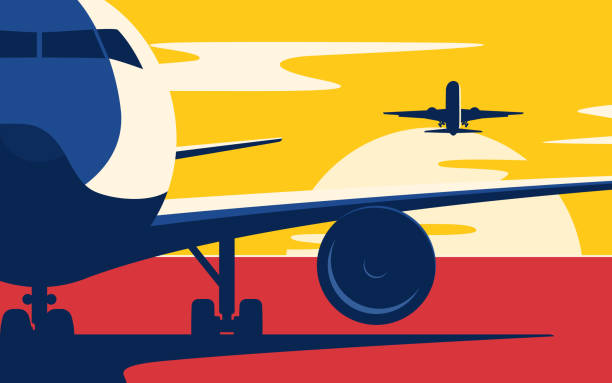

# Business Problem

Our company has been providing high-quality air transportation service to our clients for several years, ensuring a safe, comfortable, and convenient journey for our passengers. We operate a diverse fleet of aircraft, ranging from small business jets to medium-sized machines. However, we currently face challenges due to various factors such as stricter environmental regulations, higher flight taxes, increased interest rates, rising fuel prices, and a tight labor market leading to higher labor costs. These challenges are putting pressure on the company's profitability, and we are actively seeking solutions to address this issue. In order to tackle this challenge, the company is planning to analyze their database and identify opportunities to increase the occupancy rate, thereby boosting the average profit earned per seat.

# Key Obstacles
1. **Stricter environmental regulations:** The airlines industry is facing increasing pressure to reduce its carbon footprint, leading to the implementation of more stringent environmental laws. These regulations not only raise operating costs but also restrict the potential for expansion.

2. **Higher flight taxes:** Governments worldwide are imposing heavier taxes on aircraft as a means to address environmental concerns and generate revenue. This increase in flight taxes has raised the overall cost of flying, subsequently reducing demand.

3. **Tight labor market resulting in increased labor costs:** The aviation sector is experiencing a scarcity of skilled workers, leading to higher labor costs and an increase in turnover rates.

<br><br>
Let's get started !!

# Importing Libraries

In [ ]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json

import warnings
warnings.filterwarnings('ignore')

# Connecting to Database

In [ ]:
conn = sqlite3.connect('/kaggle/input/airline-data-analysis/travel.sqlite')
cursor = conn.cursor()

# List of Tables

In [ ]:
tables = pd.read_sql("""SELECT *
                        FROM sqlite_master
                        WHERE type='table';""", conn)
tables

# Data Exploration

In [ ]:
aircrafts_data = pd.read_sql_query("select * from aircrafts_data", conn)
aircrafts_data

### Observation
- Seems like we have some data in multiple languages.
- We need to keep only understandable data

In [ ]:
aircrafts_data['model'] = aircrafts_data['model'].apply(lambda x: json.loads(x)['en'])
aircrafts_data

In [ ]:
airports_data = pd.read_sql_query("select * from airports_data", conn)
airports_data

In [ ]:
airports_data['airport_name'] = airports_data['airport_name'].apply(lambda x: json.loads(x)['en'])
airports_data['city'] = airports_data['city'].apply(lambda x: json.loads(x)['en'])

In [ ]:
airports_data

In [ ]:
boarding_passes = pd.read_sql_query("select * from boarding_passes", conn)
boarding_passes

In [ ]:
bookings = pd.read_sql_query("select * from bookings", conn)
bookings

In [ ]:
flights = pd.read_sql_query("select * from flights", conn)
flights

In [ ]:
seats = pd.read_sql_query("select * from seats", conn)
seats

In [ ]:
ticket_flights = pd.read_sql_query("select * from ticket_flights", conn)
ticket_flights

In [ ]:
tickets = pd.read_sql_query("select * from tickets", conn)
tickets

In [ ]:
sns.set_style('whitegrid')
fig,axes = plt.subplots(figsize=(12,8))
ax = sns.barplot(x='model',y='range', data=aircrafts_data, palette = 'Paired')
for container in ax.containers:
    ax.bar_label(container)
plt.title('AirPlane Models with their ranges')
plt.xticks(rotation=45)
plt.show()

### Planes having more than 100 seats

In [ ]:
df = pd.read_sql_query("""select aircraft_code, count(*) as num_seats from seats
                        group by aircraft_code having num_seats >100""", conn)

df.to_csv('aircraft_seats.csv')

In [ ]:
sns.set_style('whitegrid')
fig,axes = plt.subplots(figsize=(12,8))
ax = sns.barplot(x='aircraft_code',y='num_seats', data=df, palette = 'flare')
for container in ax.containers:
    ax.bar_label(container)
plt.title('AirCraft codes Vs Number of Seats')
plt.xticks(rotation=45)
plt.show()

In [ ]:
crafts = pd.read_sql("""SELECT aircraft_code, model->'en'
                        FROM aircrafts_data
                        where aircraft_code IN (319, 320, 321, 733, 763, 773);""", conn)
crafts

### Observation
- Here we successfully derived the names of airplanes using their codes
- So it seems like " Boeing 777-300 " is having maximum number of seats (402).

### Number of tickets booked and total amount earned changed with the time

In [ ]:
tickets = pd.read_sql_query("""select * from tickets inner join bookings
                    on tickets.book_ref = bookings.book_ref""", conn)

tickets['book_date'] = pd.to_datetime(tickets['book_date'])
tickets['date'] = tickets['book_date'].dt.date
tickets_count = tickets.groupby('date')[['date']].count()
plt.figure(figsize=(18,6))
plt.plot(tickets_count.index, tickets_count['date'], color='green', scalex=True, marker = "*")
plt.title('Number of Tickets Booked on Each Date', fontsize=30)
plt.xlabel('Date', fontsize=20)
plt.ylabel('Number of Tickets', fontsize=20)
plt.grid('b')
plt.show()

### Observation
- Utilized a line chart visualization to analyze the trend of ticket bookings and revenue earned.
- The number of tickets booked showed a gradual increase from June 22nd to July 7th.
- From July 8th until August, ticket bookings remained relatively stable with a noticeable peak in bookings on a single day.
- The revenue earned by the company is closely correlated with the number of tickets booked.
- The total revenue earned followed a similar trend throughout the analyzed time period.
- Further exploration of the factors contributing to the peak in ticket bookings could help increase overall revenue and optimize operational strategies.

In [ ]:
bookings = pd.read_sql_query("select * from bookings", conn)

bookings['book_date'] = pd.to_datetime(bookings['book_date'])
bookings['date'] = bookings['book_date'].dt.date
booking_amount = bookings.groupby('date')[['total_amount']].sum()

plt.figure(figsize=(18,6))
plt.plot(booking_amount.index, booking_amount['total_amount'],color='orange',scalex=True, marker = '*')
plt.title('Number of Tickets Booked on Each Date', fontsize=30)
plt.xlabel('Date', fontsize=20)
plt.ylabel('Total Amount Earned', fontsize=20)
plt.grid('b')
plt.show()

## Fare Distribution for the Flights

In [ ]:
df = pd.read_sql_query("""select fare_conditions, aircraft_code,avg(amount) 
                        from ticket_flights join flights 
                        on ticket_flights.flight_id = flights.flight_id
                        group by aircraft_code, fare_conditions""", conn)
df.to_csv('fare_avg_amount.csv')

sns.set_style('whitegrid')
fig,axes = plt.subplots(figsize=(12,8))
ax = sns.barplot(x='aircraft_code',y='avg(amount)',hue='fare_conditions', data=df, palette = 'flare')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Class wise Average Flight Prices')
plt.xticks(rotation=45)
plt.show()

In [ ]:
crafts = pd.read_sql("""SELECT aircraft_code, model->'en'
                        FROM aircrafts_data
                        where aircraft_code IN (319, 321, 733, 763, 773, 'CN1', 'CR2', 'SU9');""", conn)
crafts

### Observation
- Here we successfully derived the names of airplanes using their codes
- So it seems like " Airbus A319-100 " is having maximum  average number of Business class seats.
- Also " Airbus A319-100 " is having maximum average number of Economy seats.
- And " Boeing 777-300 " is having maximum number of Comfort seats.

# Examining Occupancy Rate

To maximize profitability, airlines must analyze revenue streams, including overall income, average revenue per ticket, and occupancy rates. This information helps identify profitable aircraft types, itineraries, and pricing optimization opportunities. The highest total revenue is generated by the SU9 aircraft, likely due to its lower ticket prices. The CN1 aircraft has the lowest total revenue, possibly due to its limited economy class offering. Monitoring average occupancy rates helps airlines fill seats efficiently, increase revenue, and reduce expenses. Improving occupancy rates can be financially beneficial and achieved through pricing strategies and operational considerations. Airlines should focus on optimizing pricing strategies for gradual revenue growth.

##  Total revenue per year and the average revenue per ticket.

In [ ]:
revenue = pd.read_sql_query("""select aircraft_code,ticket_count,total_revenue,total_revenue/ticket_count as avg_revenue_per_ticket from
                    (select aircraft_code, count(*) as ticket_count, sum(amount) as total_revenue from ticket_flights
                        join flights on ticket_flights.flight_id = flights.flight_id
                        group by aircraft_code)""", conn)
revenue.to_csv('revenue.csv')

### Calculate the average occupancy per aircraft

In [ ]:
occupancy_rate = pd.read_sql_query("""select a.aircraft_code,avg(a.seats_count) as booked_seats, b.num_seats, avg(a.seats_count)/b.num_seats as occupancy_rate from
                (select aircraft_code,flights.flight_id,count(*) as seats_count from boarding_passes
                    inner join flights
                    on boarding_passes.flight_id = flights.flight_id
                    group by aircraft_code,flights.flight_id) as a
                    inner join 
                    (select aircraft_code,count(*) as num_seats from seats
                    group by aircraft_code) as b
                    on a.aircraft_code = b.aircraft_code group by a.aircraft_code""", conn
                  )
occupancy_rate

### Calculating how much the total annual turnover would increase by giving all aircraft a 10% higher occupancy rate.

In [ ]:
occupancy_rate['inc occupancy rate'] = occupancy_rate['occupancy_rate']+occupancy_rate['occupancy_rate']*0.1
occupancy_rate

In [ ]:
pd.set_option("display.float_format",str)
total_revenue = pd.read_sql_query("""select aircraft_code,sum(amount) as total_revenue from ticket_flights
                        join flights on ticket_flights.flight_id = flights.flight_id
                        group by aircraft_code""", conn)
total_revenue

occupancy_rate['inc Total Annual Turnover'] = (total_revenue['total_revenue']/occupancy_rate['occupancy_rate'])*occupancy_rate['inc occupancy rate']
occupancy_rate

# Conclusion

In conclusion, airlines can maximize profitability by analyzing revenue data and making informed decisions. Factors such as total revenue, average revenue per ticket, and average occupancy per aircraft play a crucial role in this analysis. By identifying areas for improvement, adjusting pricing strategies, and optimizing routes, airlines can increase their profitability. However, it's important for airlines to consider consumer happiness and safety while striving for profit. Balancing these factors is key to long-term success in the competitive airline industry. Adopting a data-driven approach to revenue analysis and optimization can lead to sustainable growth and success.

### <p style="text-align:center;"><span style="color:red">Thanks for reading till here!! If you liked the notebook then please do Upvote👍, and do give some remarks/advice if you think anything needs to be added/modified.</span></p>
<h1 style="padding:8px;background-color:lightblue;margin:0;color:white;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 50px;overflow:hidden;font-weight:500">Work in Progress for Notebook betterment !!</h1>